<a href="https://colab.research.google.com/github/mardom/astrostatistics-2020/blob/main/Classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://arxiv.org/abs/2011.01836
https://arxiv.org/abs/2011.06103

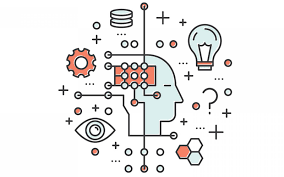


ML discovering of Physical Laws!!
https://iaifi.org/about.html

# Classification:

Previusly we described techniques for estimating joint probability distributions
from multivariate data sets and for identifying the inherent clustering within the
properties of sources. We can think of this approach as the **unsupervised classification**
of data. If, however, we have labels for some of these data points (e.g., an object is tall,
short, red, or blue) we can utilize this information to develop a relationship between
the label and the properties of a source. We refer to this as **supervised classification**.

The motivation for supervised classification comes from the long history of
classification in astronomy. Possibly the most well known of these classification
schemes is that defined by Edwin Hubble for the morphological classification of
galaxies based on their visual appearance; see https://www.zooniverse.org/projects/zookeeper/galaxy-zoo/. This simple classification scheme,
subdividing the types of galaxies into seven categorical subclasses, was broadly
adopted throughout extragalactic astronomy. Why such a simple classification be-
came so predominant when subsequent works on the taxonomy of galaxy morphol-
ogy (often with a better physical or mathematical grounding) did not, argues for
the need to keep the models for classification simple.

This agrees with the findings of George Miller who, in 1956, proposed that the number of items that people are capable of retaining within their short term memory was 7±2 (“The magical number 7±2”). Subsequent work by Herbert Simon suggested that we can increase seven
if we implement a partitioned classification system (much like telephone numbers)
with a chunk size of three. Simple schemes have more impact—a philosophy we will adopt as we develop this chapter.

## Datasets:

In order to demonstrate the strengths and weaknesses of these classification techniques, we will use two astronomical data sets throughout this chapter.
- RR Lyrae First is the set of photometric observations of RR Lyrae stars in the SDSS. The data set comes from SDSS Stripe 82, and combines the Stripe 82 standard stars, which represent observations of nonvariable stars; and the RR Lyrae variables,
pulled from the same observations as the standard stars, and selected based on their
variability using supplemental data; see [16]. The sample is further constrained to a
smaller region of the overall color–color space following [8] ($0.7 < u − g < 1.35,
−0.15 < g − r < 0.4, −0.15 < r − i < 0.22, and −0.21 < i − z < 0.25$). These
selection criteria lead to a sample of 92,658 nonvariable stars, and 483 RR Lyraes. Two
features of this combined data set make it a good candidate for testing classification
algorithms:
1. The RR Lyrae stars and main sequence stars occupy a very similar region in
u, g , r, i, z color space. The distributions overlap slightly, which makes the
choice of decision boundaries subject to the completeness and contamination
trade-off.
2. The extreme imbalance between the number of sources and the number of background objects is typical of real-world astronomical studies, where
it is often desirable to select rare events out of a large background. Such unbalanced data aptly illustrates the strengths and weaknesses of various classification methods.

- Quasars and stars: As a second data set for photometric classification, we make use of two catalogs of quasars and stars from the SDSS Spectroscopic Catalog. The quasars are derived from the DR7 Quasar Catalog, while the stars are derived from the SEGUE Stellar
Parameters Catalog. The combined data has approximately 100,000 quasars and 300,000 stars. In this chapter, we use the u − g , g − r , r − i , and i − z colors to demonstrate photometric classification of these objects. We stress that because of the different selection functions involved in creating the two catalogs, the combined sample does not reflect a real-world sample of the objects: we use it for purposes of
illustration only.

- Photometric redshifts
While photometric redshifts are technically a regression problem, they offer an excellent test case for decision trees and random forests. The data for the photometric redshifts come from the SDSS spectroscopic database. The magnitudes used are the model magnitudes mentioned above, while the true redshift measurements come from the spectroscopic pipeline.

## Assigning Categories: Classification
Supervised classification takes a set of features and relates them to predefined sets
of classes. Choosing the optimal set of features was touched on in the discussion of
dimensionality reduction. We will not address how we define the labels or taxonomy for the classification other than noting that the time-honored system of having a graduate student label data does not scale to the size of today’s data. 

We start by assuming that we have a set of predetermined labels that have been assigned
to a subset of the data we are considering. Our goal is to characterize the relation
between the features in the data and their classes and apply these classifications to a
larger set of unlabeled data.
As we go we will illuminate the connections between classification, regression,
and density estimation. Classification can be posed in terms of density estimation—
this is called **generative classification** (so-called since we will have a full model of the
density for each class, which is the same as saying we have a model which describes
how data could be generated from each class). This will be our starting point, where
we will visit a number of methods. Among the advantages of this approach is a high
degree of interpretability.

Starting from the same principles we will go to classification methods that focus
on finding the decision boundary that separates classes directly, avoiding the step of
modeling each class’s density, called **discriminative classification**, which can often be better in high-dimensional problems.

### Classification Loss
Perhaps the most common loss (cost) function in classification is zero-one loss, where
we assign a value of one for a misclassification and zero for a correct classification.
With $\hat{y}$ representing the best guess value of $y$, we can write this classification loss,
$L(y, \hat{y})$, as:

$$L(y, \hat{y})=\delta(y\neq\hat{y})$$

The classification risk of a model (defined to be the expectation value of the
loss) is given by:

$$E[L(y, \hat{y})]=p(y\neq\hat{y})$$

or the probability of misclassification. This can be compared to the case of regression,
where the most common loss function is $L(y, \hat{y})=(y-\hat{y})^2$, leading to the risk $E[(y-\hat{y})^2]$. For the zero-one loss of classification, the risk is equal to the misclassification rate or error rate.

One particularly common case of classification in astronomy is that of “detection,” where we wish to assign objects (i.e., regions of the sky or groups of pixels on a CCD) into one of two classes: a detection (usually with label 1) and a nondetection (usually with label 0). When thinking about this sort of problem, we may wish to distinguish between the two possible kinds of error: assigning a label 1 to an object
whose true class is 0 (a “false positive”), and assigning the label 0 to an object whose
true class is 1 (a “false negative”).

we will define the *completeness and contamination*,

$$completeness=\frac{true\ positives}{true\  positives + false\ negatives}$$

$$contamination=\frac{false\ positives}{true\  positives + false\ positives}$$

The completeness measures the fraction of total detections identified by our classifier,
while the contamination measures the fraction of detected objects which are misclassified. Depending on the nature of the problem and the goal of the classification, we may wish to optimize one or the other.

Alternative names for these measures abound: in some fields the completeness and contamination are respectively referred to as the “sensitivity” and the “Type I error.” In astronomy, one minus the contamination is often referred to as the “efficiency.” In machine learning communities, the efficiency and completeness are respectively referred to as the “precision” and “recall.”

# Generative Classification

Given a set of data {$x_i$} consisting of N points in D dimensions, such that $x_i^j$ is the j-th feature of the i-th point, and a set of discrete labels {$y_i$} drawn from K classes, with values $y_k$ , Bayes’ theorem describes the relation between the labels and features:

$$p(y_k|x_i)=\frac{p(x_i|y_k)p(y_k)}{\sum_i p(x_i|y_k)p(y_k)}$$

If we knew the full probability densities $p(x, y)$ it would be straightforward to
estimate the classification likelihoods directly from the data. If we chose not to fully
sample $p(x, y)$ with our training set we can still define the classifications by drawing
from $p(y|x)$ and comparing the likelihood ratios between classes (in this way we can
focus our labeling on the specific, and rare, classes of source rather than taking a
brute-force random sample).

In generative classifiers we are modeling the class-conditional densities explicitly, which we can write as $p_k (x)$ for $p(x|y = y_k)$, where the class variable is, say, $y_k = 0$ or $y_k = 1$. The quantity $p(y = y_k)$, or $\pi_k$ for short, is the probability of any point having class k, regardless of which point it is. This can be interpreted as the prior probability of the class k. If these are taken to include subjective information, the whole approach is Bayesian. If they are estimated from data, for
example by taking the proportion in the training set that belong to class k, this can
be considered as either a frequentist or as an empirical Bayes.

The task of learning the best classifier then becomes the task of estimating the $p_k$’s. This approach means we will be doing multiple separate density estimates using many of the techniques introduced. The most powerful (accurate) classifier of this type then, corresponds to the most powerful density estimator used for the $p_k$ models. Thus the rest of this section will explore various models and approximations for the $p_k (x)$. We will start with the simplest kinds of models, and gradually build the model complexity from there. First, though, we will discuss several illuminating aspects of the generative classification model.

## General Concepts of Generative Classification
With slightly more effort, we can formally relate the classification task to two of the
major machine learning tasks we have seen already: density estimation and regression. Recall, that the regression function $\hat{y} =
f(y|x)$: it represents the best guess value of $y$ given a specific value of $x$. **Classification is simply the analog of regression where $y$ is categorical**, for example y = {0, 1}. We
now call $f (y|x)$ **the discriminant function**:

$$g(x)=f(y|x)=\int y p(y|x) dy = 1 . p(y=1|x)+0 . p(y=0|x)$$

If we now apply Bayes’ rule, we find

$$g(x)=\frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1)+p(x|y=0)p(y=0)}=\frac{\pi_1 p_1(x)}{\pi_1 p_1(x)+\pi_0 p_0(x)}$$

## Bayes classifier
Making the discriminant function yield a binary prediction gives the abstract template called a Bayes classifier. It can be formulated as:


$$\hat{y}=1\ if\ g(x)>1/2;\\\ 0\ otherwise$$

$$\hat{y}=1\ if\ p(y=1|x)>p(y=0|x);\\\ 0\ otherwise$$

$$\hat{y}=1\ if\ \pi_1p_1(x) > \pi_0 p_0 (x);\\\ 0\ otherwise$$

This is easily generalized to any number of classes K , since we can think of a $g_k (x)$
for each class (in a two-class problem it is sufficient to consider $g (x) = g_1 (x)$). The
Bayes classifier is a template in the sense that one can plug in different types of model
for the $p_k$’s and the $\pi$’s. Furthermore, the Bayes classifier can be shown to be optimal
if the $p_k$’s and $\pi$’s are chosen to be the true distributions: that is, lower error cannot
be achieved. The Bayes classification template as described is an instance of empirical
Bayes.

Again, keep in mind that so far this is “Bayesian” only in the sense of utilizing
Bayes’ rule, an identity based on the definition of conditional distributions,
not in the sense of Bayesian inference. The interpretation/usage of the $\pi_k$ quantities
is what will make the approach either Bayesian or frequentist.

## Decision boundary
The decision boundary between two classes is the set of x values at which each class
is equally likely; that is,

$$\pi_1p_1(x)=\pi_2 p_2(x)$$

Figure  shows an example of the decision boundary for a simple model
in one dimension, where the density for each class is modeled as a Gaussian. This is
very similar to the concept of hypothesis testing described previusly.





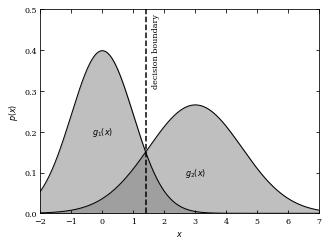

In [3]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Compute the two PDFs
x = np.linspace(-3, 7, 1000)
pdf1 = norm(0, 1).pdf(x)
pdf2 = norm(3, 1.5).pdf(x)
x_bound = x[np.where(pdf1 < pdf2)][0]

#------------------------------------------------------------
# Plot the pdfs and decision boundary
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111)
ax.plot(x, pdf1, '-k', lw=1)
ax.fill_between(x, pdf1, color='gray', alpha=0.5)

ax.plot(x, pdf2, '-k', lw=1)
ax.fill_between(x, pdf2, color='gray', alpha=0.5)

# plot decision boundary
ax.plot([x_bound, x_bound], [0, 0.5], '--k')

ax.text(x_bound + 0.2, 0.49, "decision boundary",
        ha='left', va='top', rotation=90)

ax.text(0, 0.2, '$g_1(x)$', ha='center', va='center')
        
ax.text(3, 0.1, '$g_2(x)$', ha='center', va='center')

ax.set_xlim(-2, 7)
ax.set_ylim(0, 0.5)

ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')

plt.show()

# Naive Bayes
The Bayes classifier formalism presented above is conceptually simple, but can be
very difficult to compute: in practice, the data {x} above may be in many dimensions,
and have complicated probability distributions. We can dramatically reduce the
complexity of the problem by making the assumption that all of the attributes we measure are conditionally independent. This means that

$$p(x^i, x^j|y_k)=p(x^i|y_k)p(x^j|y_k)$$

where, recall, the superscript indexes the feature of the vector x. For data in many
dimensions, this assumption can be expressed as

$$p(x^0, x^1, x^2, ...,x^N|y_k)=\prod_{i}p(x^i|y_k)$$

Again applying Bayes’ rule, we rewrite as$$

$$p(y_k|x^0,x^1,x^2,..,x^N)=\frac{\prod_i p(x^i|y_k)p(y_k)}{\sum_{j}\prod_{i} p(x^i|y_j)p(y_j)}$$

Using this expression, we can calculate the most likely value of y by maximizing over $y_k$,

$$\hat{y}=argmax_{y_k} \frac{\prod_i p(x^i|y_k)p(y_k)}{\sum_{j}\prod_{i} p(x^i|y_j)p(y_j)}$$

or, using our shorthand notation,

$$\hat{y}=argmax_{y_k} \frac{\prod_i p_k(x^i)\pi_k}{\sum_{j}\prod_{i} p_j(x^i)\pi_j}$$

This gives a general prescription for the naive Bayes classification. Once sufficient models for $p_k (x^i)$ and $\pi_k$ are known, the estimator $\hat{y}$ can be computed very simply. The challenge, then, is to determine $p_k(x^i)$ and $\pi_k$ , most often from a set of training data. This can be accomplished in a variety of ways, from fitting parametrized models, to more general parametric and nonparametric density estimation techniques previusly discussed.

The determination of $p_k (x^i )$ and $\pi_k$ can be particularly simple when the features
$x^i$ are categorical rather than continuous. In this case, assuming that the training
set is a fair sample of the full data set (which may not be true), for each label $y_k$ in
the training set, the maximum likelihood estimate of the probability for feature $x^i$
is simply equal to the number of objects with a particular value of $x^i$, divided by
the total number of objects with $y = y_k$. The prior probabilities $\pi_k$ are given by the
fraction of training data with $y = y_k$.

Almost immediately, a complication arises. If the training set does not cover the full parameter space, then this estimate of the probability may lead to $p_k (x^i ) = 0$ for
some value of $y_k$ and $x^i$. If this is the case, then the posterior probability $p(y_k |{x^ i }) = 0/0$ which is undefined! A particularly simple solution in this case is to
use Laplace smoothing: an offset $\alpha$ is added to the probability of each bin $p_k (x^i )$ for all i, k, leading to well-defined probabilities over the entire parameter space.

Though this may seem to be merely a heuristic trick, it can be shown to be equivalent to the
addition of a Bayesian prior to the naive Bayes classifier.

## Gaussian Naive Bayes and Gaussian Bayes Classifiers
It is rare in astronomy that we have discrete measurements for x even if we have
categorical labels for y. The estimator for $\hat{y}$ given,  can also be applied to
continuous data, given a sufficient estimate of $p_k (x^i)$. In Gaussian naive Bayes, each
of these probabilities $p_k (x^i)$ is modeled as a one-dimensional normal distribution,
with means $\mu_{k}^{i}$ and widths $\sigma_{k}^{i}$ determined, for example, using  frequentist techniques. In this case the estimator can be expressed as:

$$\hat{y}=argmax_{y_k} [ln \pi_k -\frac{1}{2}\sum_{i=1}^{N} (2\pi(\sigma_{k}^{i})^2 + \frac{(x^i-\mu_{k}^{i})^2}{(\sigma_{k}^{i})^2}  )]$$

where for simplicity we have taken the log of the Bayes criterion, and omitted the
normalization constant, neither of which changes the result of the maximization.

This Gaussian naive Bayes estimator essentially assumes that the multivariate distribution $p(x|y_k )$ can be modeled using an axis-aligned multivariate Gaussian distribution. 

In the figure, we perform a Gaussian naive Bayes classification on a simple, well-separated data set. Though examples like this one make
classification straightforward, data in the real world is rarely so clean. Instead, the
distributions often overlap, and categories have hugely imbalanced numbers. These
features are seen in the RR Lyrae data set.

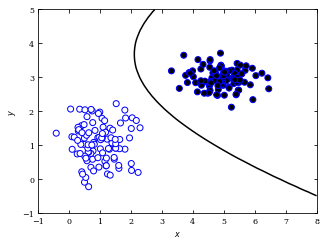

In [4]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from sklearn.naive_bayes import GaussianNB

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Simulate some data
np.random.seed(0)
mu1 = [1, 1]
cov1 = 0.3 * np.eye(2)

mu2 = [5, 3]
cov2 = np.eye(2) * np.array([0.4, 0.1])

X = np.concatenate([np.random.multivariate_normal(mu1, cov1, 100),
                    np.random.multivariate_normal(mu2, cov2, 100)])
y = np.zeros(200)
y[100:] = 1

#------------------------------------------------------------
# Fit the Naive Bayes classifier
clf = GaussianNB()
clf.fit(X, y)

# predict the classification probabilities on a grid
xlim = (-1, 8)
ylim = (-1, 5)
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.binary, zorder=2)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

plt.show()

Next figure we show the naive Bayes classification for RR Lyrae stars from SDSS
Stripe 82. The completeness and contamination for the classification are shown in the
right panel, for various combinations of features. Using all four colors, the Gaussian
naive Bayes classifier in this case attains a completeness of 87.6%, at the cost of a
relatively high contamination rate of 79.0%.
A logical next step is to relax the assumption of conditional independence in
eq. 9.16, and allow the Gaussian probability model for each class to have arbitrary
correlations between variables. Allowing for covariances in the model distributions
leads to the Gaussian Bayes classifier.

This step from Gaussian naive Bayes to a more general Gaussian Bayes formalism can include a large jump in computational cost: to fit a D-dimensional multivariate normal distribution to observed data involves estimation of D(D +
3)/2 parameters, making a closed-form solution
increasingly tedious as the number of features D grows large.



downloading cross-matched SDSS/2MASS dataset from https://github.com/astroML/astroML-data/raw/master/datasets/stripe82calibStars_v2.6.dat.gz to /root/astroML_data

uncompressing file...
completeness [0.48175182 0.68613139 0.81021898 0.87591241]
contamination [0.85201794 0.79295154 0.80143113 0.79020979]


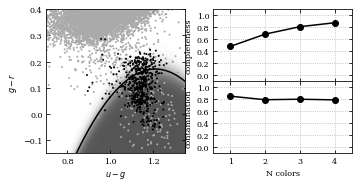

In [5]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.naive_bayes import GaussianNB
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# perform Naive Bayes
classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)

order = np.array([1, 0, 2, 3])

for nc in Ncolors:
    clf = GaussianNB()
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])

    classifiers.append(clf)
    predictions.append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 81),
                     np.linspace(ylim[0], ylim[1], 71))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)
ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# Plot completeness vs Ncolors
ax = plt.subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# Plot contamination vs Ncolors
ax = plt.subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

#Important Cofee Breack: 
https://www.ted.com/talks/joy_buolamwini_how_i_m_fighting_bias_in_algorithms?language=en

https://www.technologyreview.com/2019/10/17/75285/ai-fairer-than-judge-criminal-risk-assessment-algorithm/


Coming soon: https://vimeo.com/414917737

Also see: https://www.netflix.com/ar-en/title/80117542

## Linear Discriminant Analysis and Relatives
Linear discriminant analysis (LDA), like Gaussian naive Bayes, relies on some
simplifying assumptions about the class distributions $p_k (x)$ in eq. 9.6. In particular, it assumes that these distributions have identical covariances for all K classes. 

This makes all classes a set of shifted Gaussians. The optimal classifier can then be derived from the log of the class posteriors to be

$$g_k(x)=x^T \sigma^{-1} \mu_k -\frac{1}{2} \mu_k^T \sigma^{-1} +log(\pi_k)$$

with $\mu_k$ the mean of class k and $\Sigma$ the covariance of the Gaussians (which, in general, does not need to be diagonal). The class dependent covariances that would normally
give rise to a quadratic dependence on x cancel out if they are assumed to be constant.
The Bayes classifier is, therefore, linear with respect to x.

The discriminant boundary between classes is the line that minimizes the overlap between Gaussians $g_k(x)-g_l(x)=0$.

If we were to relax the requirement that the covariances of the Gaussians are
constant, the discriminant function for the classes becomes quadratic in x:

$$g(x)=-\frac{1}{2}log(|\Sigma_k|)-\frac{1}{2}(x-\mu_k)^T C^{-1} (x-\mu_k)+log(\pi_k)$$

This is sometimes known as quadratic discriminant analysis (QDA), and the bound-
ary between classes is described by a quadratic function of the features x.

A related technique is called Fisher’s linear discriminant (FLD). It is a special case
of the above formalism where the priors are set equal but without the requirement
that the covariances be equal. Geometrically, it attempts to project all data onto a
single line, such that a decision boundary can be found on that line. By minimizing
the loss over all possible lines, it arrives at a classification boundary. Because FLD is
so closely related to LDA and QDA, we will not explore it further.

completeness [0.48175182 0.67153285 0.67153285 0.67153285]
contamination [0.85300668 0.80590717 0.80467091 0.80590717]


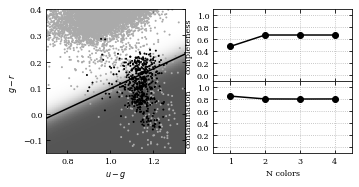

In [6]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# perform LinearDiscriminantAnalysis
classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)

for nc in Ncolors:
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])

    classifiers.append(clf)
    predictions.append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness, 'o-k', ms=6, label='unweighted')

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6, label='unweighted')

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')

ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

completeness [0.48175182 0.68613139 0.73722628 0.78832117]
contamination [0.85201794 0.79249448 0.77555556 0.75675676]


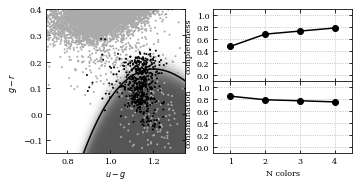

In [7]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# perform QuadraticDiscriminantAnalysis
classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)

for nc in Ncolors:
    clf = QuadraticDiscriminantAnalysis()
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])

    classifiers.append(clf)
    predictions.append(y_pred)

predictions = np.array(predictions)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness, 'o-k', c='k', ms=6, label='unweighted')

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', c='k', ms=6, label='unweighted')

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')

ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

## More Flexible Density Models: Mixtures and Kernel Density Estimates
The above methods take the very general result expressed in eq. 9.6 and introduce
simplifying assumptions which make the classification more computationally feasi-
ble. However, assumptions regarding conditional independence (as in naive Bayes)
or Gaussianity of the distributions (as in Gaussian Bayes, LDA, and QDA) are
not necessary parts of the model. With a more flexible model for the probability distribution, we could more closely model the true distributions and improve on our
ability to classify the sources. 

The next common step up in representation power for each $p_k (x)$, beyond a
single Gaussian with arbitrary covariance matrix, is to use a Gaussian mixture model
(GMM). Let us call this the GMM Bayes classifier for lack of a standard term. Each of the components may be constrained to a simple case (such as diagonal-covariance-only Gaussians etc.) to ease the computational cost of model
fitting. Note that the number of Gaussian components K must be chosen, ideally, for
each class independently, in addition to the cost of model fitting for each value of
K tried.


@pickle_results: computing results and saving to 'GMMbayes_rrlyrae.pkl'
completeness [[0.48175182 0.68613139 0.73722628 0.78832117]
 [0.         0.11678832 0.43065693 0.68613139]]
contamination [[0.85201794 0.79249448 0.77605322 0.75675676]
 [0.         0.33333333 0.14492754 0.21666667]]


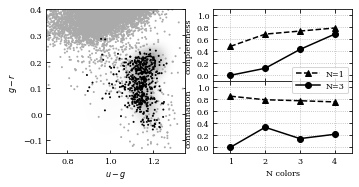

In [8]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt

from astroML.classification import GMMBayes
from astroML.utils.decorators import pickle_results
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results

# GMM-bayes takes several minutes to run, and is order[N^2]
#  truncating the dataset can be useful for experimentation.
#X = X[::10]
#y = y[::10]

(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)
N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# perform GMM Bayes
Ncolors = np.arange(1, X.shape[1] + 1)
Ncomp = [1, 3]


@pickle_results('GMMbayes_rrlyrae.pkl')
def compute_GMMbayes(Ncolors, Ncomp):
    classifiers = []
    predictions = []

    for ncm in Ncomp:
        classifiers.append([])
        predictions.append([])
        for nc in Ncolors:
            clf = GMMBayes(ncm, tol=1E-5, covariance_type='full')
            clf.fit(X_train[:, :nc], y_train)
            y_pred = clf.predict(X_test[:, :nc])

            classifiers[-1].append(clf)
            predictions[-1].append(y_pred)

    return classifiers, predictions

classifiers, predictions = compute_GMMbayes(Ncolors, Ncomp)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1][1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])
Z = Z[:, 1].reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 1.5)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)
ax.plot(Ncolors, completeness[0], '^--k', ms=6, label='N=%i' % Ncomp[0])
ax.plot(Ncolors, completeness[1], 'o-k', ms=6, label='N=%i' % Ncomp[1])

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination[0], '^--k', ms=6, label='N=%i' % Ncomp[0])
ax.plot(Ncolors, contamination[1], 'o-k', ms=6, label='N=%i' % Ncomp[1])
ax.legend(loc='lower right',
          bbox_to_anchor=(1.0, 0.78))

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))

ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

# K -Nearest-Neighbor Classifier
It is now easy to see the intuition behind one of the most widely used and powerful
classifiers, the nearest-neighbor classifier: that is, just use the class label of the nearest
point. The intuitive justification is that $p(y|x) ≈ p(y|x')$ if x' is very close to x.

It can also be understood as an approximation to kernel discriminant analysis where a  variable-bandwidth (where the bandwidth is based on the distance to the nearest neighbor) kernel density estimate is used. The simplicity of K-nearest-neighbor is hat it assumes nothing about the form of the conditional density distribution, that is, it is completely nonparametric. The resulting decision boundary between the nearest-neighbor points is a Voronoi tessellation of the attribute space.

A smoothing parameter, the number of neighbors K , is typically used to regulate the complexity of the classification by acting as a smoothing of the data. In its simplest form a majority rule classification is adopted, where each of the K points votes on the classification. Increasing K decreases the variance in the classification but at the expense of an increase in the bias. Choosing K such that it minimizes the classification error rate can be achieved using cross-validation.

Weights can be assigned to the individual votes by weighting the vote by the distance to the nearest point, similar in spirit to kernel regression. In fact, the K -nearest-neighbor classifier is directly related to kernel regression, where the regressed value was weighted by a distance-dependent kernel.

In general a Euclidean distance is used for the distance metric. This can, however, be problematic when comparing attributes with no defined distance metric (e.g., comparing morphology with color). An arbitrary rescaling of any one of the axes can lead to a mixing of the data and alter the nearest-neighbor classification.

Normalization of the features (i.e., scaling from [0–1]), weighting the importance of features based on cross-validation (including a 0/1 weighting which is effectively a feature selection), and use of the Mahalanobis distance $D(x, x_o) = (x −x_o )^T C^{−1} (x −
x_0)$ which weights by the covariance of the data, are all approaches that have been
adopted to account for this effect.

Like all nonparametric methods, nearest-neighbor classification works best when the number of samples is large; when the number of data is very small, parametric methods which “fill in the blanks” with model-based assumptions are
often best. While it is simple to parallelize, the computational time for searching
for the neighbors (even using kd-trees) can be expensive and particularly so for
high-dimensional data sets. Sampling of the training samples as a function of source
density can reduce the computational requirements.

https://www.netflixprize.com/community/topic_1537.html

completeness [[0.22627737 0.3649635  0.46715328 0.54014599]
 [0.00729927 0.23357664 0.40145985 0.53284672]]
contamination [[0.78014184 0.53271028 0.44347826 0.41732283]
 [0.875      0.44827586 0.24657534 0.23958333]]


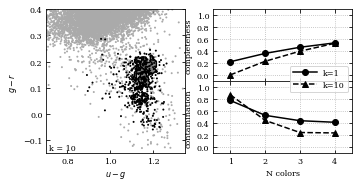

In [9]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from sklearn.neighbors import KNeighborsClassifier
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# perform Classification

classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)
kvals = [1, 10]

for k in kvals:
    classifiers.append([])
    predictions.append([])
    for nc in Ncolors:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train[:, :nc], y_train)
        y_pred = clf.predict(X_test[:, :nc])

        classifiers[-1].append(clf)
        predictions[-1].append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1][1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

Z = clf.predict(np.c_[yy.ravel(), xx.ravel()])
Z = Z.reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 2)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

ax.text(0.02, 0.02, "k = %i" % kvals[1],
        transform=ax.transAxes)

# plot completeness vs Ncolors
ax = fig.add_subplot(222)

ax.plot(Ncolors, completeness[0], 'o-k', ms=6, label='k=%i' % kvals[0])
ax.plot(Ncolors, completeness[1], '^--k', ms=6, label='k=%i' % kvals[1])

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination[0], 'o-k', ms=6, label='k=%i' % kvals[0])
ax.plot(Ncolors, contamination[1], '^--k', ms=6, label='k=%i' % kvals[1])
ax.legend(loc='lower right',
          bbox_to_anchor=(1.0, 0.79))

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

# Discriminative Classification
With nearest-neighbor classifiers we started to see a subtle transition—while clearly
related to Bayes classifiers using variable-bandwidth kernel estimators, the class
density estimates were skipped in favor of a simple classification decision. This is
an example of discriminative classification, where we directly model the decision
boundary between two or more classes of source. Recall, for $y ∈ {0, 1}$, the
discriminant function is given by $g (x) = p(y = 1|x)$. Once we have it, no matter
how we obtain it, we can use the rule

$$\hat{y}=1\ if\ g(x) \geq 1/2; 0\ otherwise$$

## Logistic Regression
Logistic regression can be in the form of two (binomial) or more (multinomial)
classes. For the initial discussion we will consider binomial logistic regression and
consider the linear model 

$$p(y=1|x)=\frac{exp[\sum_j \theta_j x^j]}{1+exp[\sum_j \theta_j x^j]}=p(\theta)$$

where we define the logit function as

$$logit(p_i)=log(\frac{p_i}{1-p_i})=\sum_j \theta_j x^j$$

In logistic regression the model is by assumption

$$log(\frac{p(y=1|x)}{p(y=0|x)})=\beta_0+\beta^T x$$



completeness [0.98540146 1.         1.         1.        ]
contamination [0.88588335 0.84180139 0.84088269 0.84014002]
[-10.35625743]
[[-24.22780633  15.09174567]]


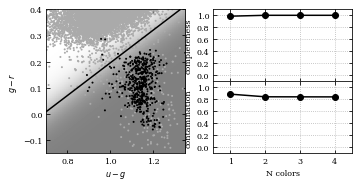

In [10]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

from sklearn.linear_model import LogisticRegression
from astroML.datasets import fetch_rrlyrae_combined
from astroML.utils import split_samples
from astroML.utils import completeness_contamination

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#----------------------------------------------------------------------
# get data and split into training & testing sets
X, y = fetch_rrlyrae_combined()
X = X[:, [1, 0, 2, 3]]  # rearrange columns for better 1-color results
(X_train, X_test), (y_train, y_test) = split_samples(X, y, [0.75, 0.25],
                                                     random_state=0)

N_tot = len(y)
N_st = np.sum(y == 0)
N_rr = N_tot - N_st
N_train = len(y_train)
N_test = len(y_test)
N_plot = 5000 + N_rr

#----------------------------------------------------------------------
# perform Classification
classifiers = []
predictions = []
Ncolors = np.arange(1, X.shape[1] + 1)

for nc in Ncolors:
    clf = LogisticRegression(class_weight='balanced')
    clf.fit(X_train[:, :nc], y_train)
    y_pred = clf.predict(X_test[:, :nc])

    classifiers.append(clf)
    predictions.append(y_pred)

completeness, contamination = completeness_contamination(predictions, y_test)

print("completeness", completeness)
print("contamination", contamination)

#------------------------------------------------------------
# Compute the decision boundary
clf = classifiers[1]
xlim = (0.7, 1.35)
ylim = (-0.15, 0.4)

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 71),
                     np.linspace(ylim[0], ylim[1], 81))

print(clf.intercept_)
print(clf.coef_)

Z = clf.predict_proba(np.c_[yy.ravel(), xx.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

#----------------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.15, top=0.95, hspace=0.0,
                    left=0.1, right=0.95, wspace=0.2)

# left plot: data and decision boundary
ax = fig.add_subplot(121)
im = ax.scatter(X[-N_plot:, 1], X[-N_plot:, 0], c=y[-N_plot:],
                s=4, lw=0, cmap=plt.cm.binary, zorder=2)
im.set_clim(-0.5, 1)

im = ax.imshow(Z, origin='lower', aspect='auto',
               cmap=plt.cm.binary, zorder=1,
               extent=xlim + ylim)
im.set_clim(0, 2)

ax.contour(xx, yy, Z, [0.5], colors='k')

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('$u-g$')
ax.set_ylabel('$g-r$')

# plot completeness vs Ncolors
ax = fig.add_subplot(222)

ax.plot(Ncolors, completeness, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.NullFormatter())

ax.set_ylabel('completeness')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

# plot contamination vs Ncolors
ax = fig.add_subplot(224)
ax.plot(Ncolors, contamination, 'o-k', ms=6)

ax.xaxis.set_major_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.2))
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%i'))
ax.set_xlabel('N colors')
ax.set_ylabel('contamination')
ax.set_xlim(0.5, 4.5)
ax.set_ylim(-0.1, 1.1)
ax.grid(True)

plt.show()

Conferencia Enrique Gaviola "2020" | Dr. Francisco Tamarit
https://www.youtube.com/watch?v=wRBOvEA9C60&feature=youtu.be

In [2]:
!pip install astroML